In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
%matplotlib inline

pd.set_option('display.max_colwidth', None) 

warnings.filterwarnings("ignore")

/var/folders/wc/dg5vr0h57jvg48dksgcxz02w0000gn/T/ipykernel_74048/1217781074.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/processed/properties_outlier_treatment.csv")
df.head(5)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio
0,the lions cghs,flat,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),4,4,3+,...,2000.0,1800.0,0,1,0,0,1,2,92,450.022500
1,bestech park view residency,flat,sector 2,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,...,NaN,NaN,0,0,0,1,0,0,75,782.625000
2,bptp freedom park life,flat,sector 57,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,...,5010.0,NaN,1,1,0,0,0,2,120,1224.672000
3,ss the leaf,flat,sector 85,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up area: 1730 sq.ft. (160.72 sq.m.)Carpet area: 1720 sq.ft. (159.79 sq.m.),2,2,3,...,1730.0,1720.0,0,0,0,0,0,0,35,870.595000
4,vatika city homes,flat,sector 83,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet area: 1225 sq.ft. (113.81 sq.m.),3,3,3,...,NaN,1225.0,0,1,0,0,0,2,81,408.353333


In [3]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area          2010
carpet_area            1715
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='super_built_up_area', ylabel='built_up_area'>

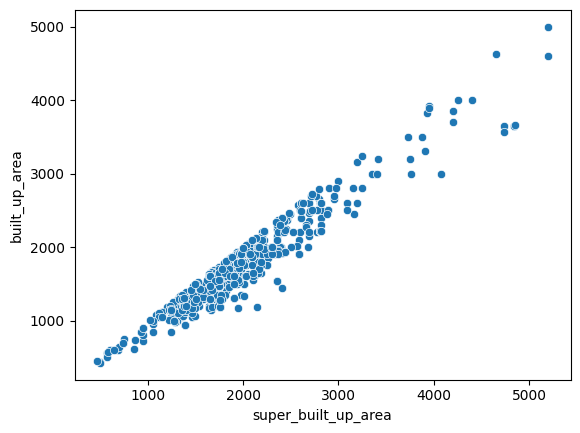

In [4]:
sns.scatterplot(x=df["super_built_up_area"], y=df["built_up_area"])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

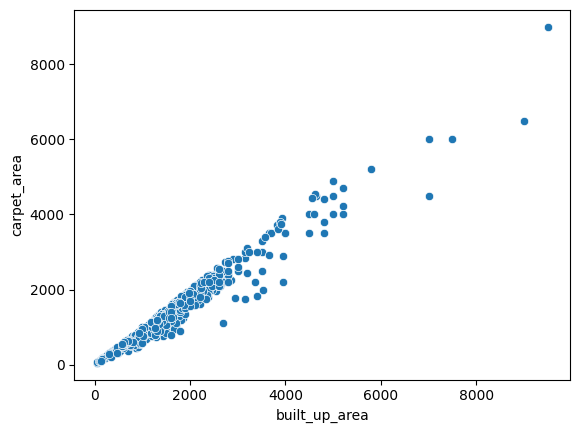

In [5]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

1. super_built_up_area and built_up_area are strongly linear with each other.
2. built_up_area and carpet_area are strongly linear with each other.

In [6]:
# LETS CHECK IF THERE ARE ANY DATA POINTS WHERE ALL THE THREE AREAS ARE MISSING
((df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull()) & (df["carpet_area"].isnull())).sum()

43

In [7]:
no_null_areas = df[~((df["super_built_up_area"].isnull()) | (df["built_up_area"].isnull()) | (df["carpet_area"].isnull()))]

In [8]:
no_null_areas.shape

(531, 24)

In [9]:
super_to_built_up_area_ratio = (no_null_areas["super_built_up_area"]/no_null_areas["built_up_area"]).median()
carpet_to_built_up_area_ratio = (no_null_areas["carpet_area"]/no_null_areas["built_up_area"]).median()

print(super_to_built_up_area_ratio)
print(carpet_to_built_up_area_ratio)

1.105263157894737
0.9


Now we can use these ratios to impute missing values for the three areas.

Lets first focus on missing values in built_up_area column. Both areas present and built up area column is null.

In [10]:
missing_built_up = df[~(df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull() & ~(df["carpet_area"].isnull()))]
missing_built_up.sample(10)[["super_built_up_area", "built_up_area", "carpet_area"]]

,super_built_up_area,built_up_area,carpet_area
1427,1010.0,NaN,700.00
1262,406.0,NaN,402.00
2810,1457.0,NaN,849.00
1633,900.0,NaN,587.00
2374,1300.0,NaN,960.00
522,1099.0,NaN,683.83
3222,2273.0,NaN,1340.00
1765,1650.0,NaN,1022.58
1967,3150.0,NaN,2750.00
1089,2289.0,NaN,1121.00


From the ratios above we will get two values for the built_up_area from two ratios and then we just take the average of two as the main imputation value.

In [11]:
missing_built_up["built_up_area"].fillna(round(((missing_built_up["super_built_up_area"]/1.105) + (missing_built_up["carpet_area"]/0.9))/2), inplace=True)
missing_built_up.head(10)[["super_built_up_area", "built_up_area", "carpet_area"]]

,super_built_up_area,built_up_area,carpet_area
4,1740.0,1468.0,1225.00
5,2350.0,1798.0,1322.00
13,4200.0,3512.0,2900.00
21,1500.0,1277.0,1077.00
28,1930.0,1740.0,1560.00
32,3200.0,3201.0,3156.00
34,2390.0,1970.0,1600.00
40,1510.0,1165.0,867.24
41,510.0,459.0,410.00
42,1730.0,1741.0,1725.00


In [12]:
missing_built_up["built_up_area"].isnull().sum()

0

In [13]:
df.update(missing_built_up)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area          1589
carpet_area            1715
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
dtype: int64

Super Builtup area and Builtup area column null and Carpet area present.

In [14]:
present_carpet = df[(df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull() & ~(df["carpet_area"].isnull()))]
present_carpet.head(10)[["super_built_up_area", "built_up_area", "carpet_area"]]

,super_built_up_area,built_up_area,carpet_area
10,NaN,NaN,501.000000
12,NaN,NaN,594.920753
19,NaN,NaN,2344.000000
24,NaN,NaN,1298.000000
25,NaN,NaN,2290.000000
27,NaN,NaN,546.000000
74,NaN,NaN,1150.000000
75,NaN,NaN,3844.000000
80,NaN,NaN,2290.000000
83,NaN,NaN,72.000000


In [15]:
present_carpet["built_up_area"].fillna(round(present_carpet["carpet_area"]/0.9), inplace=True)
present_carpet[["super_built_up_area", "built_up_area", "carpet_area"]]

,super_built_up_area,built_up_area,carpet_area
10,NaN,557.0,501.000000
12,NaN,661.0,594.920753
19,NaN,2604.0,2344.000000
24,NaN,1442.0,1298.000000
25,NaN,2544.0,2290.000000
...,...,...,...
3536,NaN,2056.0,1850.000000
3540,NaN,583.0,525.000000
3543,NaN,3000.0,2700.000000
3545,NaN,1333.0,1200.000000


In [16]:
df.update(present_carpet)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area           917
carpet_area            1715
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
dtype: int64

Carpet area and Builtup area null and Super builtup area present.

In [17]:
present_super_builtup = df[~(df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull() & (df["carpet_area"].isnull()))]
present_super_builtup.head(10)[["super_built_up_area", "built_up_area", "carpet_area"]]

,super_built_up_area,built_up_area,carpet_area
1,1565.0,NaN,NaN
8,1578.0,NaN,NaN
11,1435.0,NaN,NaN
17,1450.0,NaN,NaN
20,1620.0,NaN,NaN
22,2600.0,NaN,NaN
23,1579.0,NaN,NaN
29,2176.0,NaN,NaN
30,1245.0,NaN,NaN
31,352.0,NaN,NaN


In [18]:
present_super_builtup["built_up_area"].fillna(round(present_super_builtup["super_built_up_area"]/1.105), inplace=True)
present_super_builtup.head(10)[["super_built_up_area", "built_up_area", "carpet_area"]]

,super_built_up_area,built_up_area,carpet_area
1,1565.0,1416.0,NaN
8,1578.0,1428.0,NaN
11,1435.0,1299.0,NaN
17,1450.0,1312.0,NaN
20,1620.0,1466.0,NaN
22,2600.0,2353.0,NaN
23,1579.0,1429.0,NaN
29,2176.0,1969.0,NaN
30,1245.0,1127.0,NaN
31,352.0,319.0,NaN


In [19]:
df.update(present_super_builtup)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area            43
carpet_area            1715
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
df[df["built_up_area"].isnull()][["super_built_up_area", "built_up_area", "carpet_area"]]

,super_built_up_area,built_up_area,carpet_area
131,NaN,NaN,NaN
158,NaN,NaN,NaN
222,NaN,NaN,NaN
300,NaN,NaN,NaN
347,NaN,NaN,NaN
476,NaN,NaN,NaN
525,NaN,NaN,NaN
530,NaN,NaN,NaN
615,NaN,NaN,NaN
761,NaN,NaN,NaN


In [21]:
df.columns

Index(['society', 'property_type', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'pooja room', 'store room', 'study room', 'others',
       'furniture_labels', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [22]:
df.head(5)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio
0,the lions cghs,flat,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),4,4,3+,...,2000.0,1800.0,0,1,0,0,1,2,92,450.022500
1,bestech park view residency,flat,sector 2,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,...,1416.0,NaN,0,0,0,1,0,0,75,782.625000
2,bptp freedom park life,flat,sector 57,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,...,5010.0,NaN,1,1,0,0,0,2,120,1224.672000
3,ss the leaf,flat,sector 85,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up area: 1730 sq.ft. (160.72 sq.m.)Carpet area: 1720 sq.ft. (159.79 sq.m.),2,2,3,...,1730.0,1720.0,0,0,0,0,0,0,35,870.595000
4,vatika city homes,flat,sector 83,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet area: 1225 sq.ft. (113.81 sq.m.),3,3,3,...,1468.0,1225.0,0,1,0,0,0,2,81,408.353333


In [23]:
df["areaWithType"].sample(5)

1323    Super Built up area 915(85.01 sq.m.)Carpet area: 589.49 sq.ft. (54.77 sq.m.)
2500                                                              Carpet area: 76.44
1608                                                Carpet area: 1537 (142.79 sq.m.)
982                                           Super Built up area 1457(135.36 sq.m.)
1364                                                     Plot area 200(167.23 sq.m.)
Name: areaWithType, dtype: object

In [24]:
import re

def extract_plot(row): 
    pattern = r'Plot area \d+\(([\d.]+) sq\.m\.\)'
    match = re.match(pattern, row, re.IGNORECASE)
    
    if match:
        return match.group(1)
    else:
        return None

df["plot_area"] = df["areaWithType"].apply(extract_plot)

In [25]:
df.sample(10)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio,plot_area
882,ats tourmaline,flat,sector 109,1.75,8139.0,2150.14,Super Built up area 2150(199.74 sq.m.),3,4,3+,...,NaN,1,0,0,0,0,0,65,716.713333,None
1517,parsvnath green ville,flat,sector 48,1.60,8376.0,1910.22,Super Built up area 1910(177.44 sq.m.)Built Up area: 1895 sq.ft. (176.05 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),3,3,3+,...,1800.0,0,0,0,0,1,2,35,636.740000,None
3072,smart world gems,flat,sector 89,1.30,9135.0,1423.10,Carpet area: 1423 (132.2 sq.m.),3,3,2,...,1423.0,0,0,0,1,0,0,35,474.366667,None
3401,ild greens,flat,sector 37c,0.75,5245.0,1429.93,Built Up area: 1430 (132.85 sq.m.),2,2,3+,...,NaN,0,0,0,0,0,0,51,714.965000,None
2017,puri diplomatic greens,flat,sector 111,3.50,11864.0,2950.10,Super Built up area 2950(274.06 sq.m.)Built Up area: 2700 sq.ft. (250.84 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,5,3+,...,2500.0,1,0,0,0,0,2,35,737.525000,None
2519,independent,house,sector 24,2.60,24074.0,1080.00,Plot area 120(100.34 sq.m.),4,4,3+,...,NaN,0,1,1,1,0,1,0,270.000000,100.34
3213,rof ananda,flat,sector 95,0.55,5500.0,1000.00,Super Built up area 1000(92.9 sq.m.)Carpet area: 745 sq.ft. (69.21 sq.m.),3,2,2,...,745.0,0,0,0,1,0,1,22,333.333333,None
2706,puri diplomatic greens,flat,sector 111,3.40,11525.0,2950.11,Super Built up area 2950(274.06 sq.m.),4,5,3+,...,NaN,1,0,0,0,0,0,65,737.527500,None
214,valley view estate,flat,gwal pahari,0.38,6089.0,624.08,Super Built up area 624(57.97 sq.m.),1,1,1,...,NaN,0,0,0,0,0,0,28,624.080000,None
118,dhoot time residency,flat,sector 63,3.00,18271.0,1641.95,Built Up area: 1642 (152.55 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3+,...,1500.0,1,0,0,0,0,2,0,547.316667,None


In [26]:
null_builtup = df[(df["built_up_area"].isnull()) & ~(df["plot_area"].isnull())]
null_builtup[["built_up_area", "plot_area"]]

,built_up_area,plot_area
158,NaN,419.74
222,NaN,22.3
347,NaN,418.06
476,NaN,133.78
525,NaN,200.67
530,NaN,418.06
615,NaN,419.74
761,NaN,200.67
776,NaN,83.61
806,NaN,250


In [27]:
null_builtup["plot_area_sqft"] = [float(row) * 10.7639 for row in null_builtup["plot_area"]]

Built up area and plot area serve the same purpose respectively in cases of flats and houses. So we can use plot area to fill up missing builtup area.

In [28]:
null_builtup["built_up_area"].fillna(round(null_builtup["plot_area_sqft"]), inplace=True)
null_builtup[["built_up_area", "plot_area"]]

,built_up_area,plot_area
158,4518.0,419.74
222,240.0,22.3
347,4500.0,418.06
476,1440.0,133.78
525,2160.0,200.67
530,4500.0,418.06
615,4518.0,419.74
761,2160.0,200.67
776,900.0,83.61
806,2691.0,250


In [29]:
df.update(null_builtup)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1011
agePossession             0
super_built_up_area    1681
built_up_area             5
carpet_area            1715
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
plot_area              2978
dtype: int64

In [30]:
df[df["built_up_area"].isnull()][["super_built_up_area", "built_up_area", "carpet_area", "plot_area"]]

,super_built_up_area,built_up_area,carpet_area,plot_area
131,NaN,NaN,NaN,None
300,NaN,NaN,NaN,None
1716,NaN,NaN,NaN,None
2388,NaN,NaN,NaN,None
3139,NaN,NaN,NaN,None


In [31]:
df = df[~(df["built_up_area"].isnull())]
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1010
agePossession             0
super_built_up_area    1676
built_up_area             0
carpet_area            1710
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
plot_area              2973
dtype: int64

In [32]:
# LETS IMPUTE SUPER BUILTUP AREA VALUES USING BUILTUP AREA VALUES AND THE RATIO OF TWO
null_super = df[(df["super_built_up_area"].isnull()) & ~(df["built_up_area"].isnull())]
null_super[["super_built_up_area", "built_up_area"]]

,super_built_up_area,built_up_area
2,NaN,5010.0
7,NaN,2430.0
9,NaN,3150.0
10,NaN,557.0
12,NaN,661.0
...,...,...
3545,NaN,1333.0
3546,NaN,1278.0
3548,NaN,2093.0
3551,NaN,3950.0


In [33]:
null_super["super_built_up_area"].fillna((super_to_built_up_area_ratio * null_super["built_up_area"]), inplace=True)

null_super["super_built_up_area"] = null_super["super_built_up_area"].apply(lambda x: round(x, 2))
null_super[["super_built_up_area", "built_up_area"]]

,super_built_up_area,built_up_area
2,5537.37,5010.0
7,2685.79,2430.0
9,3481.58,3150.0
10,615.63,557.0
12,730.58,661.0
...,...,...
3545,1473.32,1333.0
3546,1412.53,1278.0
3548,2313.32,2093.0
3551,4365.79,3950.0


In [34]:
df.update(null_super)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1010
agePossession             0
super_built_up_area       0
built_up_area             0
carpet_area            1710
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
plot_area              2973
dtype: int64

In [35]:
# LETS IMPUTE CARPET AREA VALUES USING BUILTUP AREA VALUES AND THE RATIO OF TWO
null_carpet = df[(df["carpet_area"].isnull()) & ~(df["built_up_area"].isnull())]
null_carpet[["carpet_area", "built_up_area"]]

,carpet_area,built_up_area
1,NaN,1416.0
2,NaN,5010.0
7,NaN,2430.0
8,NaN,1428.0
11,NaN,1299.0
...,...,...
3547,NaN,516.0
3548,NaN,2093.0
3549,NaN,1127.0
3551,NaN,3950.0


In [36]:
null_carpet["carpet_area"].fillna((super_to_built_up_area_ratio * null_carpet["built_up_area"]), inplace=True)

null_carpet["carpet_area"] = null_carpet["carpet_area"].apply(lambda x: round(x, 2))
null_carpet[["carpet_area", "built_up_area"]]

,carpet_area,built_up_area
1,1565.05,1416.0
2,5537.37,5010.0
7,2685.79,2430.0
8,1578.32,1428.0
11,1435.74,1299.0
...,...,...
3547,570.32,516.0
3548,2313.32,2093.0
3549,1245.63,1127.0
3551,4365.79,3950.0


In [37]:
df.update(null_carpet)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1010
agePossession             0
super_built_up_area       0
built_up_area             0
carpet_area               0
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
plot_area              2973
dtype: int64

The builtup area is modified using 3 different columns. So lets check teh distribution for last time

<Axes: >

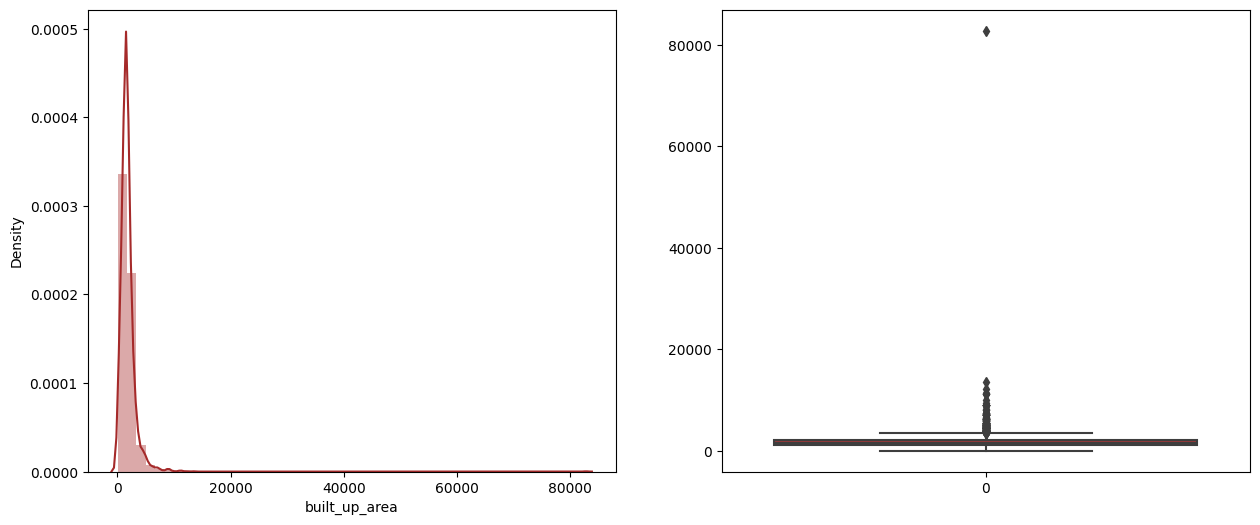

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["built_up_area"], ax=ax[0], color="brown")
sns.boxplot(df['built_up_area'], ax=ax[1], color="brown")

In [39]:
df[df["built_up_area"] > 20000]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio,plot_area
3009,ganpati heights apartment,house,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),3,6,2,...,91521.32,0,0,0,0,1,0,7,345.0,7692.86


In [40]:
df = df[df["built_up_area"] < 20000]

<Axes: >

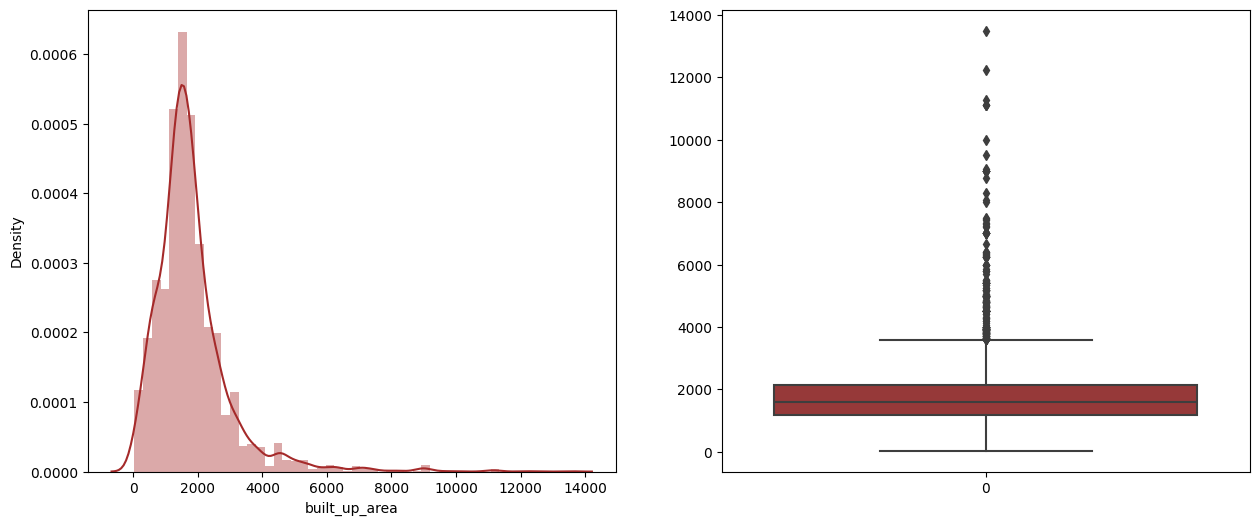

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df["built_up_area"], ax=ax[0], color="brown")
sns.boxplot(df['built_up_area'], ax=ax[1], color="brown")

<Axes: xlabel='built_up_area', ylabel='price'>

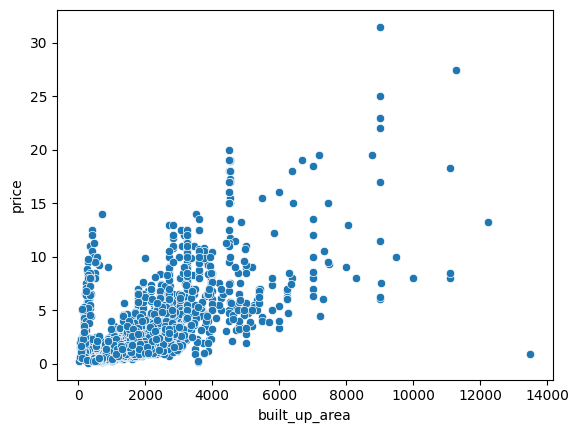

In [42]:
sns.scatterplot(x=df["built_up_area"], y=df["price"])

In [43]:
error_df = df[(df["built_up_area"] < 2000) & (df["price"] > 2.5)][["price", "area", "built_up_area"]]
error_df.sample(10)

,price,area,built_up_area
1862,2.75,1386.00,1833.0
703,2.70,2018.09,1826.0
2877,3.10,1547.99,1548.0
195,4.85,1607.02,1785.0
2742,2.80,1557.00,160.0
1495,2.85,1975.05,1800.0
51,6.15,2250.03,270.0
3024,2.58,2200.05,1991.0
319,4.45,1350.00,1350.0
2303,6.40,3150.07,349.0


In [44]:
error_df["built_up_area"] = error_df["area"]
df.update(error_df)

In [45]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2417
facing                 1010
agePossession             0
super_built_up_area       0
built_up_area             0
carpet_area               0
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
plot_area              2973
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

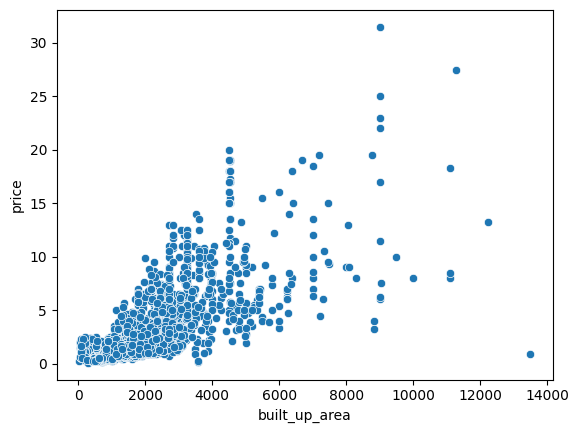

In [46]:
sns.scatterplot(x=df["built_up_area"], y=df["price"])

FLOORNUM COLUMN

In [47]:
df[df['floorNum'].isnull()]

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio,plot_area
0,the lions cghs,flat,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),4,4,3+,...,1800.00,0,1,0,0,1,2,92,450.022500,None
1,bestech park view residency,flat,sector 2,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,...,1565.05,0,0,0,1,0,0,75,782.625000,None
2,bptp freedom park life,flat,sector 57,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,...,5537.37,1,1,0,0,0,2,120,1224.672000,None
3,ss the leaf,flat,sector 85,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up area: 1730 sq.ft. (160.72 sq.m.)Carpet area: 1720 sq.ft. (159.79 sq.m.),2,2,3,...,1720.00,0,0,0,0,0,0,35,870.595000,None
4,vatika city homes,flat,sector 83,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet area: 1225 sq.ft. (113.81 sq.m.),3,3,3,...,1225.00,0,1,0,0,0,2,81,408.353333,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,sare crescent parc,flat,sector 92,1.00,4778.0,2092.93,Built Up area: 2093 (194.45 sq.m.),4,4,3,...,2313.32,0,0,0,0,0,0,0,523.232500,None
3549,vatika gurgaon,flat,sector 83,0.87,6987.0,1245.17,Super Built up area 1245(115.66 sq.m.),2,2,2,...,1245.63,0,0,0,0,0,0,21,622.585000,None
3550,emaar gurgaon greens,flat,sector 102,1.40,13690.0,1022.64,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,...,1022.58,1,0,0,0,0,0,52,340.880000,None
3551,dlf the arbour,flat,sector 63,8.50,21519.0,3950.00,Built Up area: 3950 (366.97 sq.m.),4,4,No,...,4365.79,0,0,0,0,0,0,54,987.500000,None


In [48]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [49]:
# LETS IMPUTE THE HOUSES FLOOR NUMBERS WITH THE MEDIAN
null_house = df[(df['property_type'] == 'house') & (df["floorNum"].isnull())]
null_house

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio,plot_area
466,independent,house,sector 7,6.50,15046.0,4320.09,Plot area 480(401.34 sq.m.),3,2,3+,...,4774.74,0,0,0,0,0,0,0,1440.030000,401.34
738,emaar mgf marbella,house,sector 66,9.00,21251.0,4235.09,Plot area 5605(520.72 sq.m.)Built Up area: 5200 sq.ft. (483.1 sq.m.)Carpet area: 4235 sq.ft. (393.44 sq.m.),4,4,3+,...,4235.00,1,1,1,0,0,2,92,1058.772500,520.72
846,jacob pura,house,sector 12,0.35,9722.0,360.01,Built Up area: 360 (33.45 sq.m.),2,1,0,...,397.89,0,0,0,0,0,0,0,180.005000,None
1122,ansal sushant lok plots,house,sector 43,3.30,26570.0,1242.00,Plot area 138(115.39 sq.m.),1,1,0,...,1372.74,0,0,0,0,0,0,0,1242.000000,115.39
1428,independent,house,sector 26,4.60,12198.0,3771.11,Plot area 419(350.34 sq.m.),4,4,3+,...,4167.95,0,0,0,0,0,0,28,942.777500,350.34
1491,ansal sushant lok,house,sector 43,10.50,27911.0,3761.96,Plot area 418(349.5 sq.m.),4,4,2,...,4158.00,1,0,0,0,0,0,38,940.490000,349.5
1670,vipul tatvam villa,house,sector 48,8.50,26235.0,3239.95,Plot area 360(301.01 sq.m.),4,4,1,...,3581.05,0,0,0,0,0,0,21,809.987500,301.01
1886,vipul tatvam villa,house,sector 48,8.50,26235.0,3239.95,Plot area 360(301.01 sq.m.),4,4,2,...,3581.05,1,1,1,0,0,0,66,809.987500,301.01
1936,independent,house,sector 3,1.50,10288.0,1458.01,Plot area 162(135.45 sq.m.)Built Up area: 210 sq.yards (175.59 sq.m.),3,3,0,...,232.11,0,0,0,0,0,0,0,486.003333,135.45
2012,independent,house,sector 4,0.65,11111.0,585.01,Plot area 65(54.35 sq.m.),4,2,2,...,646.58,0,0,0,0,0,0,0,146.252500,54.35


In [50]:
null_house["floorNum"].fillna(2, inplace=True)
null_house["floorNum"]

466     2.0
738     2.0
846     2.0
1122    2.0
1428    2.0
1491    2.0
1670    2.0
1886    2.0
1936    2.0
2012    2.0
2147    2.0
2497    2.0
2646    2.0
2762    2.0
3464    2.0
Name: floorNum, dtype: float64

In [51]:
df.update(null_house)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum               2402
facing                 1010
agePossession             0
super_built_up_area       0
built_up_area             0
carpet_area               0
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
plot_area              2973
dtype: int64

In [52]:
flat_null = df[df['property_type'] == 'flat']
flat_null

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score,area_room_ratio,plot_area
0,the lions cghs,flat,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),4,4,3+,...,1800.00,0,1,0,0,1,2,92,450.022500,None
1,bestech park view residency,flat,sector 2,0.98,6261.0,1565.25,Super Built up area 1565(145.39 sq.m.),2,2,3,...,1565.05,0,0,0,1,0,0,75,782.625000,None
2,bptp freedom park life,flat,sector 57,5.50,8982.0,6123.36,Built Up area: 5010 (465.44 sq.m.),5,6,3+,...,5537.37,1,1,0,0,0,2,120,1224.672000,None
3,ss the leaf,flat,sector 85,1.25,7179.0,1741.19,Super Built up area 1741(161.74 sq.m.)Built Up area: 1730 sq.ft. (160.72 sq.m.)Carpet area: 1720 sq.ft. (159.79 sq.m.),2,2,3,...,1720.00,0,0,0,0,0,0,35,870.595000,None
4,vatika city homes,flat,sector 83,1.05,8571.0,1225.06,Super Built up area 1740(161.65 sq.m.)Carpet area: 1225 sq.ft. (113.81 sq.m.),3,3,3,...,1225.00,0,1,0,0,0,2,81,408.353333,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,vatika gurgaon,flat,sector 83,0.87,6987.0,1245.17,Super Built up area 1245(115.66 sq.m.),2,2,2,...,1245.63,0,0,0,0,0,0,21,622.585000,None
3550,emaar gurgaon greens,flat,sector 102,1.40,13690.0,1022.64,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,...,1022.58,1,0,0,0,0,0,52,340.880000,None
3551,dlf the arbour,flat,sector 63,8.50,21519.0,3950.00,Built Up area: 3950 (366.97 sq.m.),4,4,No,...,4365.79,0,0,0,0,0,0,54,987.500000,None
3552,emaar mgf emerald floors premier,flat,sector 65,2.80,16969.0,1650.07,Super Built up area 1975(183.48 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),4,4,3,...,1650.00,0,0,0,1,0,2,67,412.517500,None


In [53]:
flat_null.drop(columns=["facing", "plot_area"], inplace=True)

In [54]:
null_flat = df[df["property_type"] == "flat"]["floorNum"].isnull().sum()
print(f"Percentage of missing values are {(null_flat/df.shape[0])*100}")

Percentage of missing values are 67.68103691180615


The missing values are more than 50% so we cannot just impute them using a median or mean.

In [55]:
# LETS USE KNN IMPUTER
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

columns_to_impute = ["price", "area", "bedRoom", "floorNum"]
imputed_data = imputer.fit_transform(flat_null[columns_to_impute])

imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute, index=flat_null.index)

In [56]:
imputed_df.drop(columns=["price", "area", "bedRoom"], inplace=True)

In [57]:
df.update(imputed_df)
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                 1010
agePossession             0
super_built_up_area       0
built_up_area             0
carpet_area               0
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furniture_labels          0
luxury_score              0
area_room_ratio           0
plot_area              2973
dtype: int64

In [58]:
df.drop(columns=['area','areaWithType', 'facing','super_built_up_area','carpet_area','area_room_ratio', 'plot_area'],inplace=True)

In [59]:
df.isnull().sum()

society             1
property_type       0
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum            0
agePossession       0
built_up_area       0
servant room        0
pooja room          0
store room          0
study room          0
others              0
furniture_labels    0
luxury_score        0
dtype: int64

In [60]:
df[df["society"].isnull()]


,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
2553,NaN,flat,sector 78,0.6,3692.0,2,2,No,4.0,under construction,1625.0,0,0,0,0,0,0,0


In [61]:
df.drop(index=[2553], inplace=True)
df.isnull().sum()

society             0
property_type       0
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum            0
agePossession       0
built_up_area       0
servant room        0
pooja room          0
store room          0
study room          0
others              0
furniture_labels    0
luxury_score        0
dtype: int64

In [62]:
df["agePossession"].value_counts()

agePossession
relatively new        1605
new property           556
moderately new         543
Undefined              422
old property           290
under construction     131
undefined                1
Name: count, dtype: int64

In [63]:
df[df["agePossession"] == "undefined"]

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
3132,m3m golfestate,flat,sector 79,1.4,10000.0,2,2,2,8.0,undefined,1556.0,1,0,1,1,0,1,68


In [64]:
mode_value = df['agePossession'][df['agePossession'].str.lower() != 'undefined'].mode()[0]
df['agePossession'].replace(['undefined', 'Undefined'], mode_value, inplace=True)

In [65]:
df["agePossession"].value_counts()

agePossession
relatively new        2028
new property           556
moderately new         543
old property           290
under construction     131
Name: count, dtype: int64

In [66]:
df.shape

(3548, 18)

In [67]:
from pathlib import Path 

curr_dir = Path("/Users/siddhant/housepriceproject/Capstone/notebooks/missing-value-imputation.ipynb")
home_dir = curr_dir.parent.parent.parent
destination_dir = home_dir / 'Capstone' / 'data' / 'processed'

destination_dir.mkdir(parents=True, exist_ok=True)

filename = "missing-imputed.csv"
filepath = destination_dir / filename

df.to_csv(filepath, index=False)